# Manual Graph of Thoughts Demo
This example shows how to use the `pure_graph_of_thoughts` package for manual graph of operations construction.

## Construct Graph of Operations
The graph of operations is constructed.

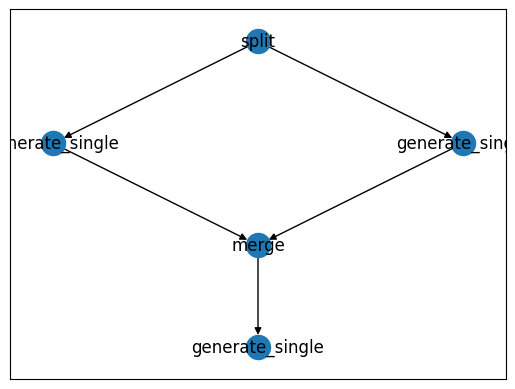

In [1]:
from auto_graph_of_thoughts.tasks.sum_list import op_split, op_merge, op_sum
from pure_graph_of_thoughts.api.graph.operation import OperationNode, GraphOfOperations
from pure_graph_of_thoughts.visualization import plot_graph

def _create_sum_list_graph_of_operations() -> GraphOfOperations:
    source = OperationNode.of(op_split)
    for _ in (1, 2):
        source.append_operation(op_sum)
    aggregate = OperationNode.of(op_merge)
    for branch in source.successors:
        branch.append(aggregate)

    aggregate.append_operation(op_sum)

    return GraphOfOperations.from_source(source)


sum_list_graph_of_operations: GraphOfOperations = _create_sum_list_graph_of_operations()
plot_graph(sum_list_graph_of_operations)

# OpenAI API Setup
To access the OpenAI API, the API key is set.

In [2]:
import os
import getpass
api_key = os.environ.get('OPENAI_API_KEY')
api_key = getpass.getpass('OPENAI_API_KEY') if api_key is None or api_key == '' else api_key
os.environ['OPENAI_API_KEY'] = api_key

## Execute Graph of Operations
ChatGPT `gpt-3.5-turbo-0125` is used as the executing language model.

In [3]:
from pure_graph_of_thoughts.language_model import ChatGPT
from pure_graph_of_thoughts.controller import CompleteGraphController
import logging
logging.basicConfig(level=logging.INFO)

chat_gpt = ChatGPT(api_key=api_key)
ctrl = CompleteGraphController(
    language_model=chat_gpt
)

INFO:CompleteGraphController:Traversing node 18001ccf-1c6d-4daa-9b40-1fbdd03dae3f
INFO:CompleteGraphController:Processing operation PromptOperation(name='split', n_inputs=1, n_outputs=2, type=<OperationType.generate: 'generate'>, output_complexity=Fraction(1, 2))
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:CompleteGraphController:Traversing node 9746690b-09d8-4c21-86a7-3ea561707531
INFO:CompleteGraphController:Processing operation PromptOperation(name='generate_single', n_inputs=1, n_outputs=1, type=<OperationType.generate: 'generate'>, output_complexity=1)
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:CompleteGraphController:Traversing node 9ae2081b-35c9-4d54-abb0-6d2846108afb
INFO:CompleteGraphController:Processing operation PromptOperation(name='generate_single', n_inputs=1, n_outputs=1, type=<OperationType.generate: 'generate'>, output_complexity=1)
INFO:httpx:HTTP Request: POST ht

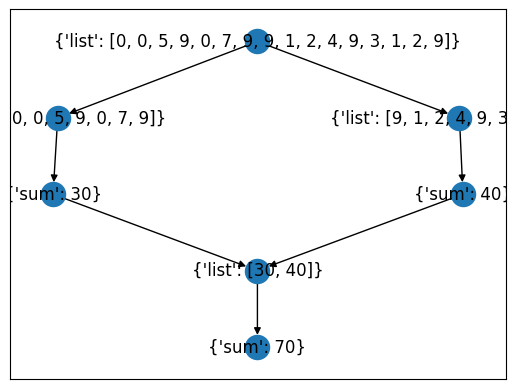

In [4]:
list = [0, 0, 5, 9, 0, 7, 9, 9, 1, 2, 4, 9, 3, 1, 2, 9]
sum_list_graph_of_thoughts = ctrl.execute_graph(sum_list_graph_of_operations, init_state={
    'list': list
})
plot_graph(sum_list_graph_of_thoughts)

The sum is correct.

In [5]:
sum(list)

70